# Lambda Layer Demo
* 以自製的「Flatten」層，代替系統的 Flatten() 神經層，來示範 Lambda Layer

## Environment Setup

In [1]:
# Install HappyML Library
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

## Data Preprocessing

11490434/11490434 [==============================] - 0s 0us/step


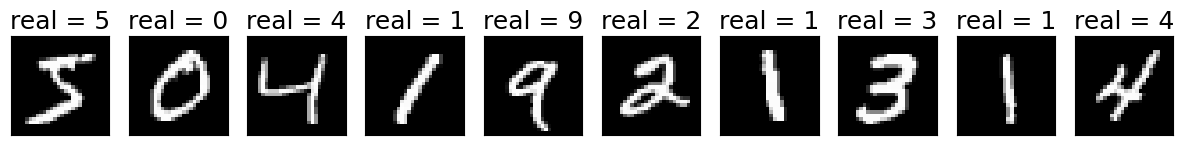

In [2]:
# Load Dataset
from tensorflow.keras.datasets import mnist

# 載入資料
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 印出前十筆，驗證載入資料成功
import HappyML.model_drawer as md
md.show_first_n_images(x_ary=train_images, y_real=train_labels, first_n=10)

In [3]:
# Data Preparing

# 將自變數 X 從 0~255 縮放至 0~1
X_train = train_images.astype("float32") / 255
X_test = test_images.astype("float32") / 255

# 將應變數 Y 從 0, 1, 2, ...9 變成 [1, 0, 0, ...0], ... [0, 0, ..., 1]（One-Hot）
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

## Model

In [4]:
# Define MNIST layers
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

# 定義 MNIST 的 Input Layer
in_lyr = Input(shape=(28, 28))

# 用自定義的「展平層」，將 28x28 展平成 784x1
from tensorflow.keras import backend
def my_flatten(tensor):
    # -1:原張量的最後一個索引值，本例為 59999（六萬筆記錄=0~59999）
    # 28*28: 展平成 784x1
    return backend.reshape(tensor, shape=(-1, 28*28))
lambda_lyr = Lambda(function=my_flatten)(in_lyr)

# 定義 MNIST 的識別層
hidden_lyr = Dense(units=128, kernel_initializer="glorot_normal", activation="relu")(lambda_lyr)

# 定義 MNIST 的輸出層
out_lyr = Dense(units=10, kernel_initializer="glorot_normal", activation="softmax")(hidden_lyr)

## Compile

In [5]:
# 從 Tensor Graph 中，挑選頭尾，建立模型
model = Model(inputs=in_lyr, outputs=out_lyr)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [6]:
# 訓練模型
model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=10, epochs=5)

Epoch 1/5
4800/4800 [==============================] - 18s 4ms/step - loss: 0.2387 - acc: 0.9292 - val_loss: 0.1238 - val_acc: 0.9633
Epoch 2/5
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1039 - acc: 0.9688 - val_loss: 0.1230 - val_acc: 0.9631
Epoch 3/5
4800/4800 [==============================] - 21s 4ms/step - loss: 0.0711 - acc: 0.9783 - val_loss: 0.1051 - val_acc: 0.9703
Epoch 4/5
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0513 - acc: 0.9838 - val_loss: 0.0910 - val_acc: 0.9747
Epoch 5/5
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0410 - acc: 0.9866 - val_loss: 0.0998 - val_acc: 0.9735


## Evaluation

In [7]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy of Testing Set:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - acc: 0.9741
Accuracy of Testing Set: 0.9740999937057495


## Inference

313/313 [==============================] - 1s 2ms/step


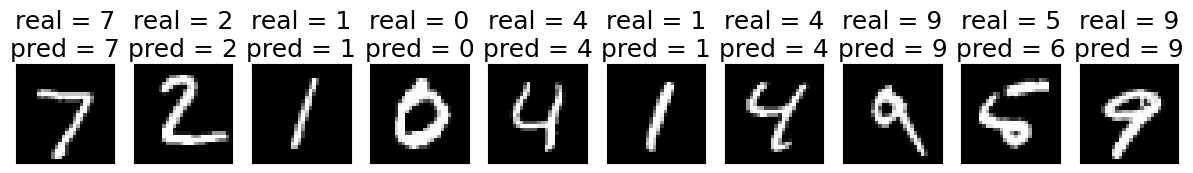

In [8]:
import numpy as np

# Predict the answer
Y_pred = np.argmax(model.predict(X_test), axis=1)

# Show the result
md.show_first_n_images(x_ary=test_images, y_real=test_labels, y_pred=Y_pred, first_n=10)